In [1]:
import graph_create
import figure_plot
import cv2
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np


- https://www.authentise.com/post/detecting-circular-shapes-using-contours
- no this one missed a lot of nodes


In [2]:
rawImage = cv2.imread('pollen_detour/tile_x001_y003.tif')

In [3]:
bilateral_filtered_image = cv2.bilateralFilter(rawImage, 5, 175, 175)

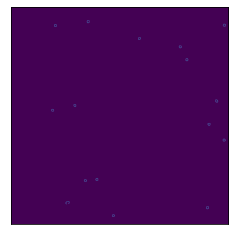

In [4]:
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)

plt.imshow(edge_detected_image)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()


In [5]:
G = graph_create.read_nefi_graph('pollen_detour/tile_x001_y003.txt') # this is from a slime-mold watershed segmentation! 

In [6]:
def quick_plot(G):
    '''
    quick plotting for spatial graphs with attr "pos" as a length 2 coordinate vector  
    '''
    node_positions = {}
    
    for node in G.nodes:
        node_positions[node] = node
    
    fig, ax = plt.subplots(figsize=(9, 9))
   
    nx.draw(G, pos=node_positions, node_size= 20, ax = ax) 
    
    plt.tight_layout()
    plt.show()   
        
    return

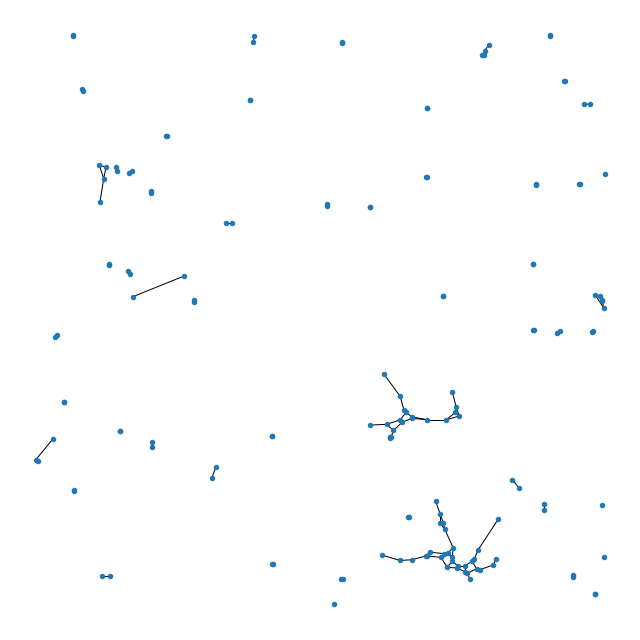

In [7]:
quick_plot(G)

In [16]:
G.number_of_edges()

31391

In [17]:
G.number_of_nodes()

55926

In [18]:
seg = cv2.imread('pollen_detour/seg_tile_x001_y003.tif')

In [ ]:
- https://stackoverflow.com/questions/46143800/removing-isolated-pixels-using-opencv

In [20]:
kernel = np.array([ [-1, -1, -1],
                    [-1,  1, -1],
                    [-1, -1, -1] ], dtype="int")
single_pixels = cv2.morphologyEx(seg, cv2.MORPH_HITMISS, kernel)
single_pixels_inv = cv2.bitwise_not(single_pixels)
image = cv2.bitwise_and(seg, seg, mask=single_pixels_inv) 


error: OpenCV(4.5.2-pre) /Users/xinzheng/opencv/modules/imgproc/src/morph.dispatch.cpp:1224: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'morphologyEx'


In [21]:
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]], np.uint8)
kernel2 = np.array([[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]], np.uint8)

hitormiss1 = cv2.morphologyEx(seg, cv2.MORPH_ERODE, kernel1)
hitormiss2 = cv2.morphologyEx(seg, cv2.MORPH_ERODE, kernel2)
hitormiss = cv2.bitwise_and(hitormiss1, hitormiss2)

cv2.imshow('isolated.png', hitormiss)
cv2.waitKey()